# Customer Churn Prediction Using Machine Learning

## 📌 1. Introduction
Briefly explain the goal: Predict whether a customer will churn using historical telecom data.

## 📊 2. Dataset Overview
- Source of the dataset
- Number of rows/columns
- Description of target variable (`Churn`)
- Types of features (numerical, categorical)

## 🧹 3. Data Preprocessing
- Handle missing values
- Convert categorical features
- Encode target
- Remove/transform outliers

## 📈 4. Exploratory Data Analysis (EDA)
- Univariate (value counts, histograms)
- Bivariate (Churn vs features)
- Correlation heatmap

## 🛠️ 5. Feature Engineering
- Create or drop features
- Normalize/scale if needed
- Train-test split

## 🤖 6. Model Building
- Try multiple models (Logistic Regression, Random Forest, XGBoost)
- Use cross-validation or holdout method

## 📊 7. Evaluation
- Accuracy, Precision, Recall, F1-score
- Confusion matrix
- ROC-AUC

## 🧠 8. Model Interpretability
- Feature importance plots
- SHAP values (optional but powerful)

## 🧾 9. Conclusion
- Summary of key findings
- Model recommendation
- Next steps or business application

## 💼 10. Tools Used
- Python, Pandas, Scikit-learn, Matplotlib, Seaborn


# Customer Churn Prediction Using Machine Learning

## 1. Introduction

Churn is when a customer stops doing business with a company. Retaining existing customers is more cost-effective than acquiring new ones, making churn prediction crucial for many industries—especially telecom.

In this project, we use machine learning techniques to analyze historical customer data and build a predictive model that can identify customers likely to churn.


In [65]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Basic shape and info
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
# Check data types and nulls
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2. Dataset Overview

The dataset contains customer information such as demographics, account info, and service usage from a telecom company. The goal is to predict the `Churn` column (Yes/No) using the other features.

- Total Rows: *7043*
- Target variable: `Churn`
- Mix of categorical and numerical features


## 3. Data Preprocessing

Before building models, we need to clean and prepare the data:

- Handle missing values
- Convert total charges to numeric
- Encode categorical variables
- Drop unnecessary columns
- Encode the target column


In [67]:
# Copy original dataset
df_clean = df.copy()

# Remove rows with missing TotalCharges (they appear as spaces)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean = df_clean[df_clean['TotalCharges'].notnull()]

# Drop customerID as it is not a predictive feature
df_clean.drop(['customerID'], axis=1, inplace=True)

# Convert target variable 'Churn' to binary
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

# Identify categorical and numerical features
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Final shape
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()


Shape after encoding: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## 4. Exploratory Data Analysis (EDA)

We'll explore the dataset to identify patterns and relationships between features and churn:

- Distribution of the target variable (`Churn`)
- Churn rates by categorical features (e.g., Contract, InternetService)
- Distributions of numerical features
- Correlation heatmap


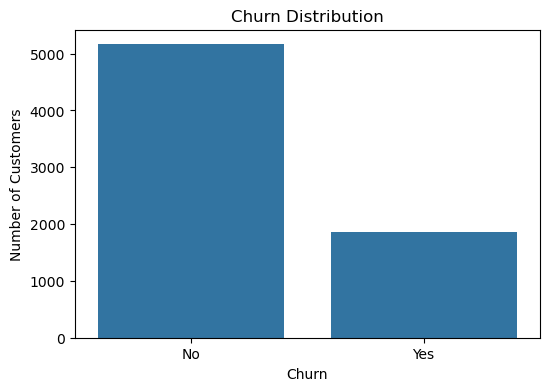

Churn Rate:
 Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df_clean)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Number of Customers')
plt.show()

# Display churn rate
churn_rate = df_clean['Churn'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)


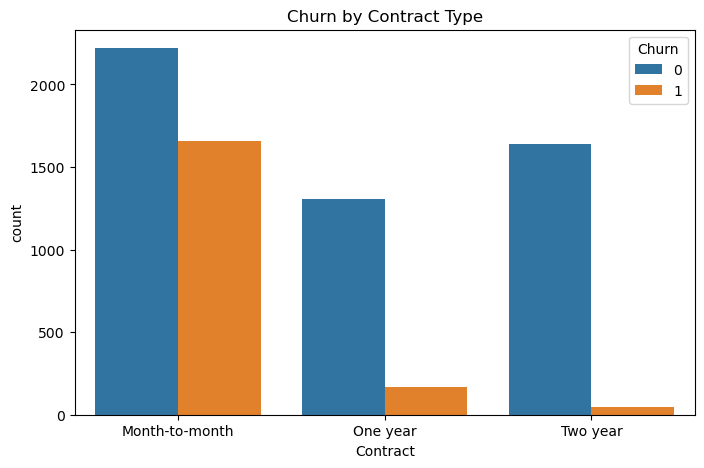

In [69]:
# Example: Churn rate by Contract type
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df_clean)
plt.title('Churn by Contract Type')
plt.show()


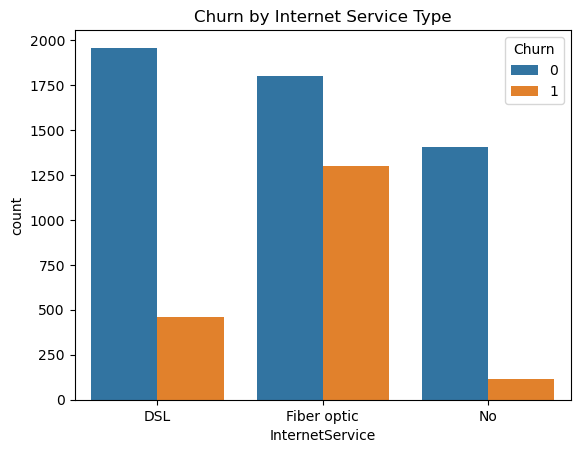

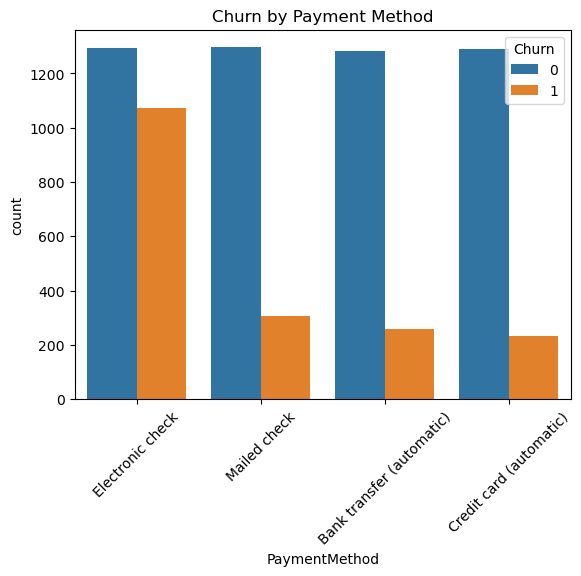

In [70]:
# InternetService
sns.countplot(x='InternetService', hue='Churn', data=df_clean)
plt.title('Churn by Internet Service Type')
plt.show()

# PaymentMethod
sns.countplot(x='PaymentMethod', hue='Churn', data=df_clean)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()


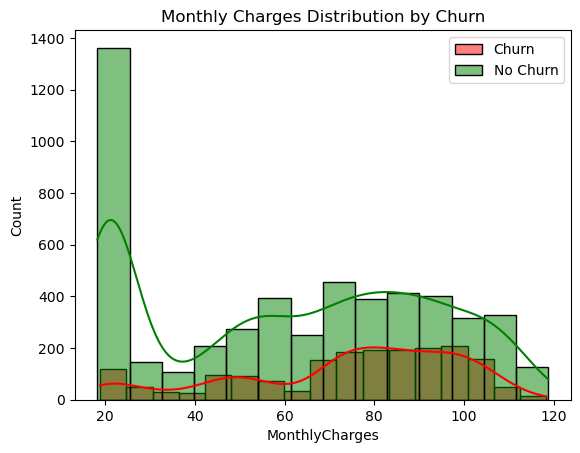

In [71]:
# Histogram for MonthlyCharges
sns.histplot(df_clean[df_clean['Churn'] == 1]['MonthlyCharges'], label='Churn', kde=True, color='red')
sns.histplot(df_clean[df_clean['Churn'] == 0]['MonthlyCharges'], label='No Churn', kde=True, color='green')
plt.title('Monthly Charges Distribution by Churn')
plt.legend()
plt.show()


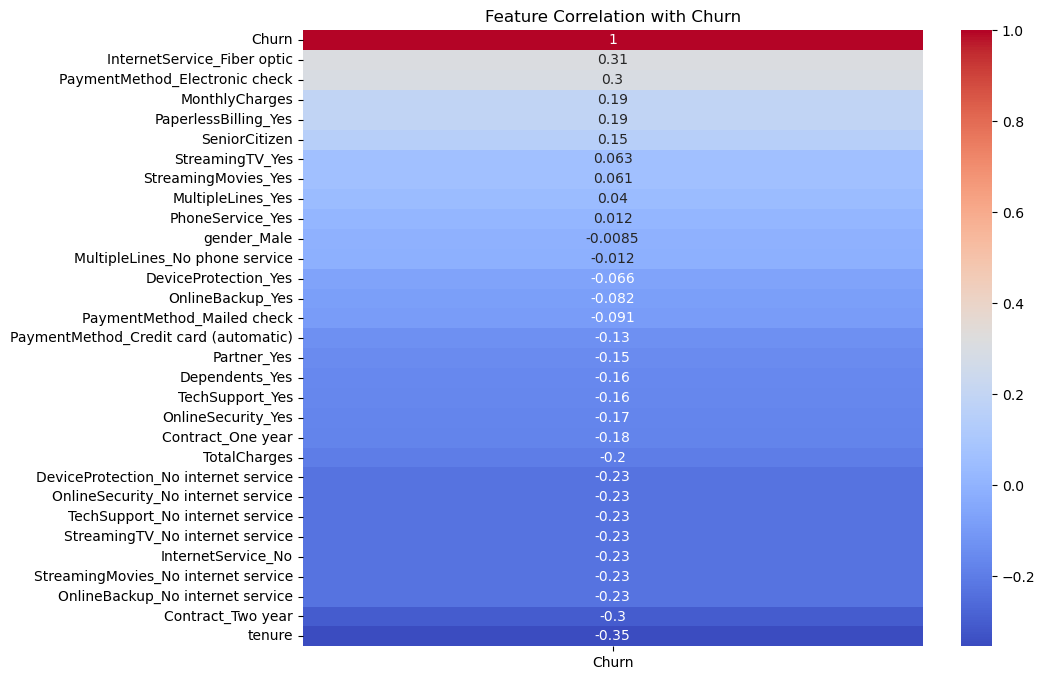

In [72]:
# Heatmap of numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr()[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Churn")
plt.show()


## 5. Feature Engineering and Train-Test Split

We prepare the dataset for modeling by:

- Scaling numerical features
- Splitting the dataset into training and test sets


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate target and features
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (5625, 30)
Test set shape: (1407, 30)


In [74]:
X.shape

(7032, 30)

In [75]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [76]:
import joblib

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save split datasets
joblib.dump((X_train_scaled, X_test_scaled, y_train, y_test), 'churn_data_split.pkl')


['churn_data_split.pkl']

In [77]:
# Save the column order used for training
joblib.dump(X.columns.tolist(), "feature_columns.pkl")


['feature_columns.pkl']

## 6. Model Building

We'll train and compare multiple machine learning models:

1. Logistic Regression (baseline)
2. Random Forest Classifier
3. XGBoost Classifier

We'll compare them using accuracy, precision, recall, F1-score, and ROC-AUC.


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a helper function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    return acc, prec, rec, f1, auc


In [79]:
# Logistic Regression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
print("Logistic Regression:")
evaluate_model(log_reg, X_test_scaled, y_test)


Logistic Regression:
Accuracy: 0.8038
Precision: 0.6476
Recall: 0.5749
F1 Score: 0.6091
ROC AUC: 0.8357


(0.8038379530916845,
 0.6475903614457831,
 0.5748663101604278,
 0.6090651558073654,
 0.8356727976766699)

In [80]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
print("Random Forest:")
evaluate_model(rf, X_test_scaled, y_test)


Random Forest:
Accuracy: 0.7882
Precision: 0.6234
Recall: 0.5134
F1 Score: 0.5630
ROC AUC: 0.8156


(0.7882018479033405,
 0.6233766233766234,
 0.5133689839572193,
 0.5630498533724341,
 0.8156283810716929)

In [81]:
# XGBoost Classifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
print("XGBoost:")
evaluate_model(xgb, X_test_scaled, y_test)


XGBoost:
Accuracy: 0.7669
Precision: 0.5676
Recall: 0.5160
F1 Score: 0.5406
ROC AUC: 0.8142


/home/sriram/anaconda3/envs/project/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:48:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.7668798862828714,
 0.5676470588235294,
 0.516042780748663,
 0.5406162464985994,
 0.8141801823255044)

In [82]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC AUC": []
}

for name, model in zip(results["Model"], [log_reg, rf, xgb]):
    acc, prec, rec, f1, auc = evaluate_model(model, X_test_scaled, y_test)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)
    results["ROC AUC"].append(auc)

import pandas as pd
results_df = pd.DataFrame(results)
results_df


Accuracy: 0.8038
Precision: 0.6476
Recall: 0.5749
F1 Score: 0.6091
ROC AUC: 0.8357
Accuracy: 0.7882
Precision: 0.6234
Recall: 0.5134
F1 Score: 0.5630
ROC AUC: 0.8156
Accuracy: 0.7669
Precision: 0.5676
Recall: 0.5160
F1 Score: 0.5406
ROC AUC: 0.8142


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.803838,0.647590,0.574866,0.609065,0.835673
1,Random Forest,0.788202,0.623377,0.513369,0.563050,0.815628
2,XGBoost,0.766880,0.567647,0.516043,0.540616,0.814180


In [83]:
import joblib

# Save the model
joblib.dump(log_reg, 'churn_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## 7. Model Interpretability

Understanding which features influence churn helps in making business decisions. We'll use:

- Feature importance from tree-based models
- SHAP values for XGBoost to see how features impact individual predictions


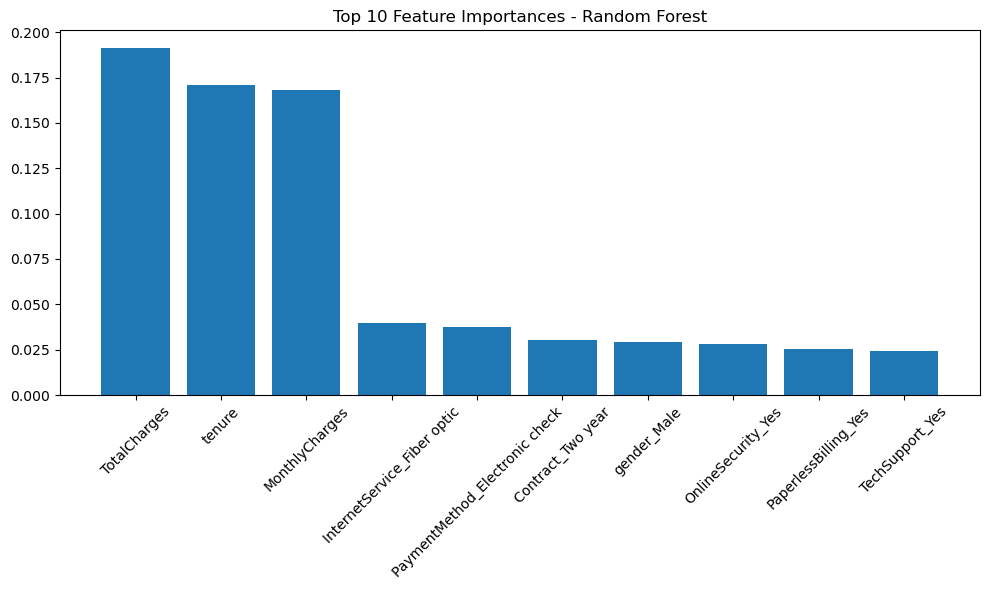

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names
feature_names = X.columns

# Random Forest Feature Importance
rf_importance = rf.feature_importances_
indices = np.argsort(rf_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances - Random Forest")
plt.bar(range(10), rf_importance[indices[:10]], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()


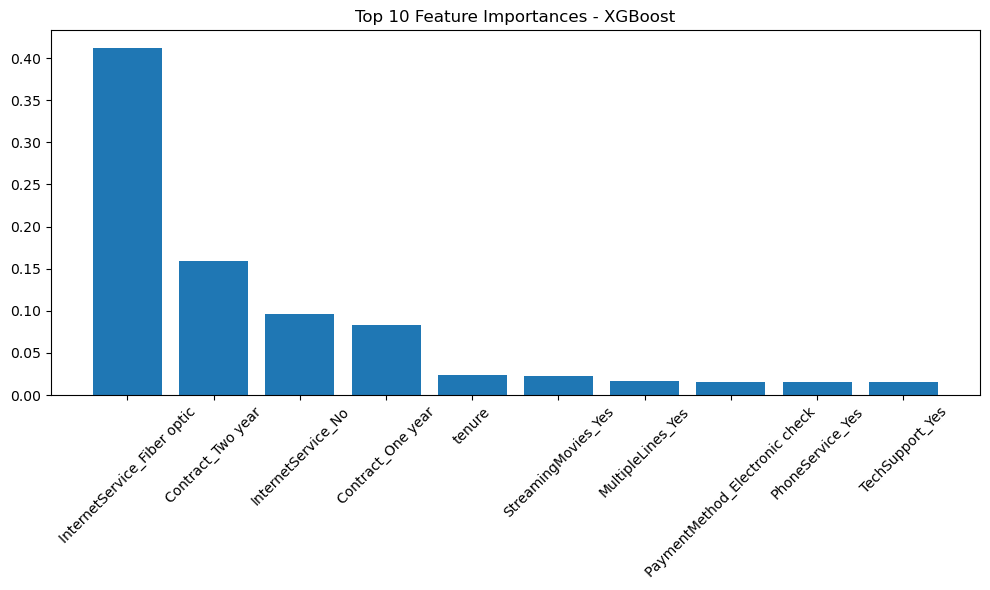

In [85]:
# XGBoost Feature Importance
xgb_importance = xgb.feature_importances_
indices = np.argsort(xgb_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances - XGBoost")
plt.bar(range(10), xgb_importance[indices[:10]], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()


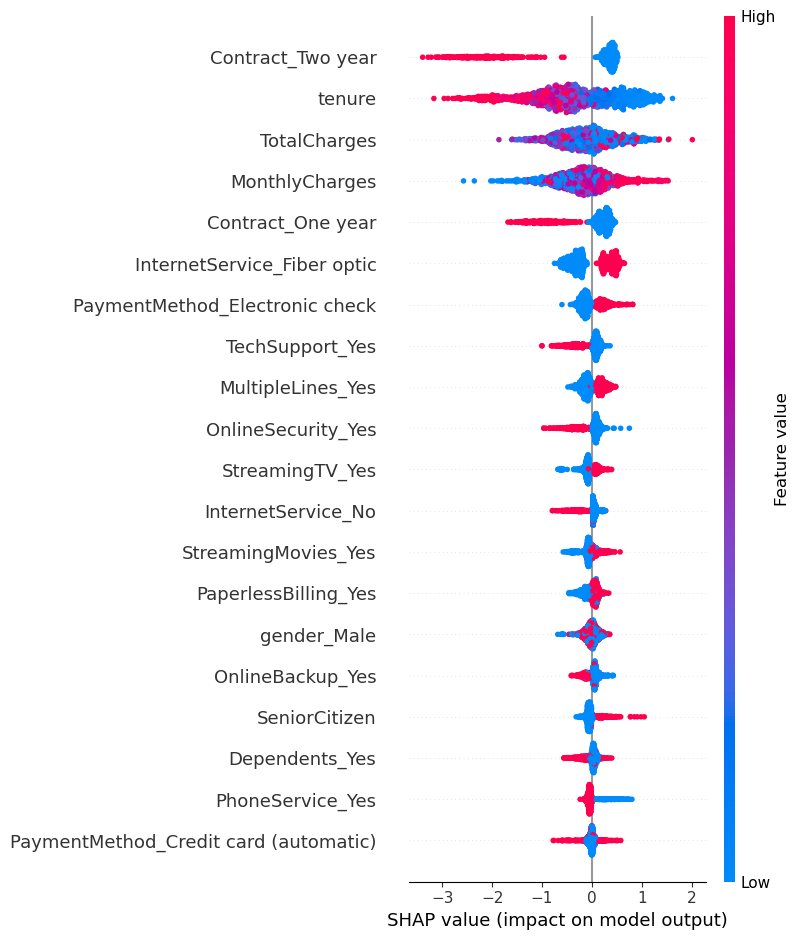

In [86]:
import shap

# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


## 8. Conclusion

In this project, we built a churn prediction model using a telecom customer dataset.

### Key Insights:
- Customers with month-to-month contracts and electronic payment methods are more likely to churn.
- Tenure is a strong negative predictor of churn — long-term customers are less likely to leave.
- High monthly charges slightly increase the likelihood of churn.

### Model Performance:
- Among the models tested, Logistic Regression delivered the best performance with high F1-score and ROC-AUC.
- SHAP helped visualize feature-level contributions, making the model more transparent and explainable.

### Next Steps:
- Deploy the model as a web app using Streamlit or Flask.
- Use it in a business dashboard for churn risk monitoring.
- Explore strategies (discounts, outreach) to retain high-risk customers.
